In [7]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [56]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

# Download latest version
path = kagglehub.dataset_download("kundanbedmutha/instagram-analytics-dataset")

print("Path to dataset files:", path)



Path to dataset files: C:\Users\barto\.cache\kagglehub\datasets\kundanbedmutha\instagram-analytics-dataset\versions\1


In [58]:
df = pd.read_csv(os.path.join(path, 'Instagram_Analytics.csv'))
print(df.head())

     post_id                 upload_date media_type   likes  comments  shares  \
0  IG0000001  2024-11-30 09:25:22.954916       Reel   31627      7559    4530   
1  IG0000002  2025-08-15 09:25:22.954916      Photo   63206      3490    1680   
2  IG0000003  2025-09-11 09:25:22.954916       Reel   94373      3727    1761   
3  IG0000004  2025-09-18 09:25:22.954916       Reel  172053      7222    2875   
4  IG0000005  2025-03-21 09:25:22.954916      Video   99646      2703    4444   

   saves    reach  impressions  caption_length  hashtags_count  \
0   6393   615036      1007750            1340               3   
1   6809  1237071      1345900            1351              20   
2   8367  1127470      1305369             242              24   
3   9290   764030       897874             446              11   
4   9746     7004       495406            1905               8   

   followers_gained traffic_source  engagement_rate content_category  
0               899      Home Feed           

In [59]:
#Missing Values
print(df.isnull().sum())

post_id             0
upload_date         0
media_type          0
likes               0
comments            0
shares              0
saves               0
reach               0
impressions         0
caption_length      0
hashtags_count      0
followers_gained    0
traffic_source      0
engagement_rate     0
content_category    0
dtype: int64


In [60]:
#Data Types
print(df.dtypes)

post_id              object
upload_date          object
media_type           object
likes                 int64
comments              int64
shares                int64
saves                 int64
reach                 int64
impressions           int64
caption_length        int64
hashtags_count        int64
followers_gained      int64
traffic_source       object
engagement_rate     float64
content_category     object
dtype: object


In [61]:
#date format conversion
df['upload_date'] = pd.to_datetime(df['upload_date'])
print(df.dtypes)

post_id                     object
upload_date         datetime64[ns]
media_type                  object
likes                        int64
comments                     int64
shares                       int64
saves                        int64
reach                        int64
impressions                  int64
caption_length               int64
hashtags_count               int64
followers_gained             int64
traffic_source              object
engagement_rate            float64
content_category            object
dtype: object


In [62]:
#custom engagement rate calculation (same as engagement_rate column)
#df['custom_engagement_rate'] = (df['likes'] + df['comments'] + df['shares']) / df['impressions'] * 100
#print(df['custom_engagement_rate'].describe())
#print(df['engagement_rate'].describe())


In [63]:
#date by dayofweek and month
df['day_of_week'] = df['upload_date'].dt.day_name()
df['month'] = df['upload_date'].dt.month_name()
print(df.head())

     post_id                upload_date media_type   likes  comments  shares  \
0  IG0000001 2024-11-30 09:25:22.954916       Reel   31627      7559    4530   
1  IG0000002 2025-08-15 09:25:22.954916      Photo   63206      3490    1680   
2  IG0000003 2025-09-11 09:25:22.954916       Reel   94373      3727    1761   
3  IG0000004 2025-09-18 09:25:22.954916       Reel  172053      7222    2875   
4  IG0000005 2025-03-21 09:25:22.954916      Video   99646      2703    4444   

   saves    reach  impressions  caption_length  hashtags_count  \
0   6393   615036      1007750            1340               3   
1   6809  1237071      1345900            1351              20   
2   8367  1127470      1305369             242              24   
3   9290   764030       897874             446              11   
4   9746     7004       495406            1905               8   

   followers_gained traffic_source  engagement_rate content_category  \
0               899      Home Feed             4.9

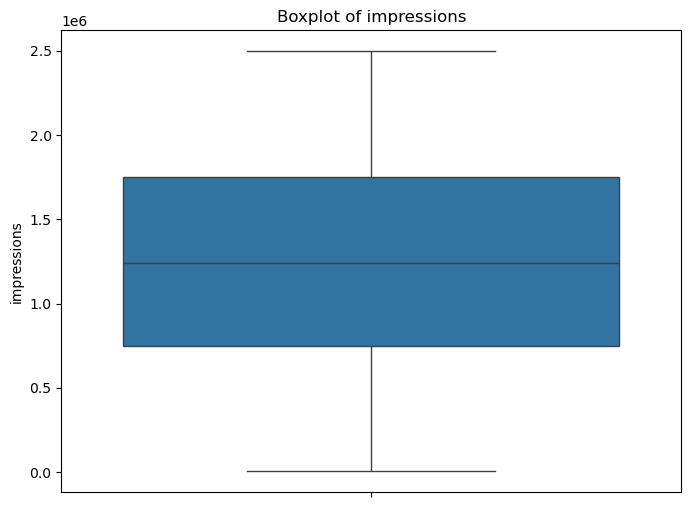

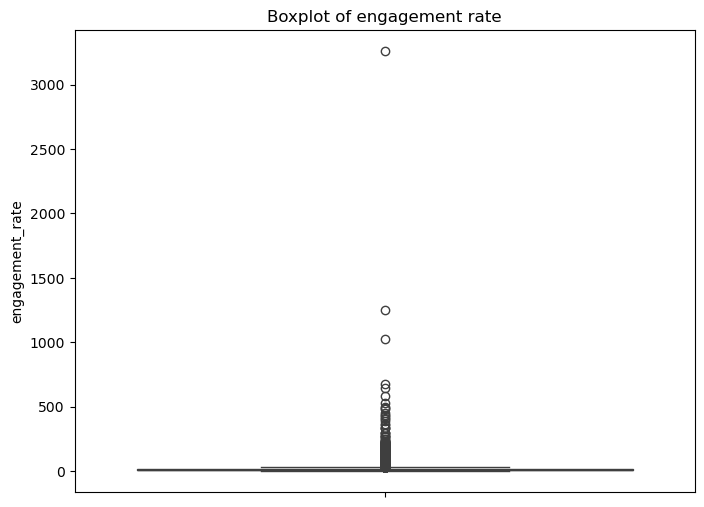

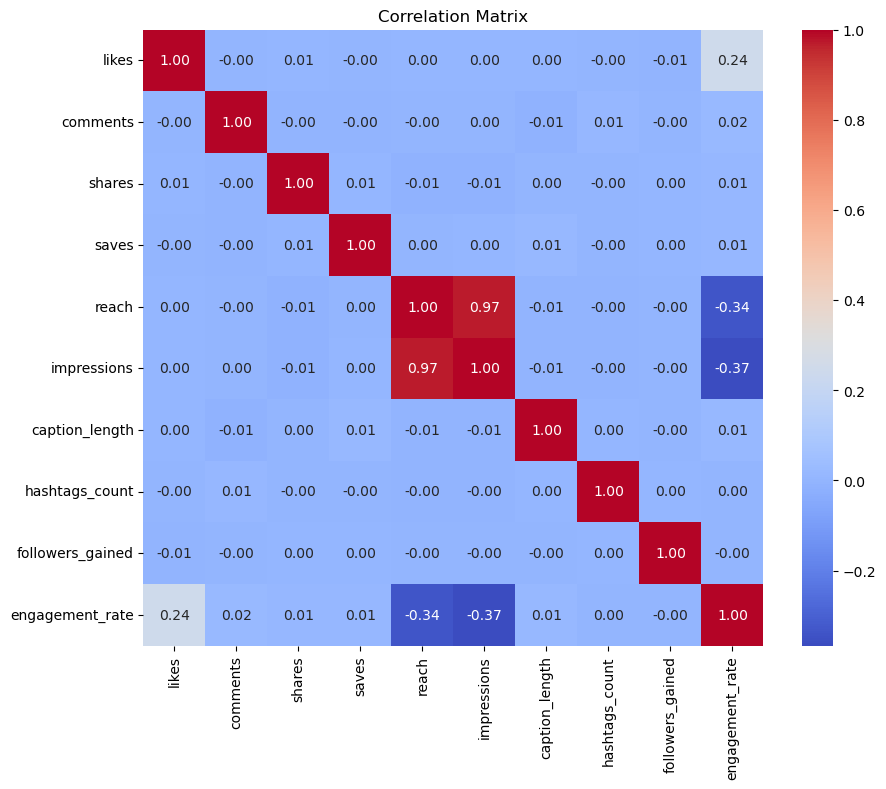

In [ ]:
#outlier detection impertions boxplot
plt.figure(figsize=(8,6))
sns.boxplot(y=df['impressions'])
plt.title('Boxplot of impressions')
plt.show()

#outlier detection engagement rate boxplot
plt.figure(figsize=(8,6))
sns.boxplot(y=df['engagement_rate'])
plt.title('Boxplot of engagement rate')
plt.show()

#correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
#dziwne te korelacje